In [1]:
import pandas as pd
import numpy as np
from csv import reader
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import gensim



In [2]:
# Import files from drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 1. Combine all data files into one dataframe

In [3]:

# tmply skip sarcasm 'twitter-2014sarcasm-A.tsv'

name_lst = ['twitter-2013dev-A.tsv', 'twitter-2013test-A.tsv', 
            'twitter-2013train-A.tsv', 'twitter-2014sarcasm-A.tsv',
            'twitter-2014test-A.tsv', 'twitter-2015test-A.tsv',
            'twitter-2015train-A.tsv', 'twitter-2016dev-A.tsv',
            'twitter-2016devtest-A.tsv','twitter-2016test-A.tsv', 
            'twitter-2016train-A.tsv']



data_array = []

tot_tweet = 0
for i in range(len(name_lst)):
    with open('/content/drive/My Drive/TM/'+ name_lst[i], 'r') as file:
        tmp = reader(file, delimiter="\t")
        if name_lst[i] == 'twitter-2016test-A.tsv':
            for row in tmp:
                data_array.append(row[:3])
        else:
            for row in tmp:
                data_array.append(row)
data_array = np.array(data_array)

## Adjust weird symbols in setences 

In [4]:
# Convert unicode to string in python such as comma with unit code of \\u002c 
import html
for i in range(len(data_array)):
    try:
        data_array[i,2] = html.unescape(data_array[i,2])
    except:
        print(i)
        
for i in range(len(data_array)):
    try:
        data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
    except:
        print(i)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\ '
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\m'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\i'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\('
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\o'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\_'
  # This is added back by 

22004
23136
25280


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\,'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: invalid escape sequence '\l'
  # This is added back by InteractiveShellApp.init_path()


In [5]:
data_array_final = []

for i in tqdm(range(len(data_array))):
  id = data_array[i][0]
  attitude = data_array[i][1]
  tweet = data_array[i][2]
  check = tweet.split("\n")
  if len(check) > 1:
    print("hey it happens")
    tweet = check[0]
    data_array_final.append([id,attitude,tweet])
    for element in check[1:]:
      a_row = element.split("\t")
      data_array_final.append(a_row)
      if len(a_row) !=3:
        print("something goes wrong", a_row)
  else:
    data_array_final.append([id,attitude,tweet])
  

data_array_final = np.array(data_array_final)


 35%|███▍      | 17416/50132 [00:01<00:02, 15585.26it/s]

hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens


 49%|████▉     | 24462/50132 [00:01<00:01, 17139.75it/s]

hey it happens


 94%|█████████▍| 47356/50132 [00:02<00:00, 17588.92it/s]

hey it happens
hey it happens
hey it happens
hey it happens
hey it happens


100%|██████████| 50132/50132 [00:03<00:00, 16445.65it/s]


In [6]:
len(data_array_final)

50334

# LSTM

## Word Embeddings As Input (Usig word2vec)

### Loading dataset for Model 1 to Model 4


### Tokenization

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


nlp.Defaults.stop_words -= {"neither","not","no","n't","nor","can't","yet","least"}

# Process the text
sentences = data_array_final[:,2]
sentence_tokenize = []
uq_words = set()

for a_sen in tqdm(sentences):
  a_sen = str(a_sen).lower()
    
# transform all words into lowercase

  doc = nlp(a_sen)
  tmp = []
  for token in doc:
    if token.like_url:
      tmp.append("URL")
    elif token.is_punct:
      continue
    elif token.text[0] == "@":
      continue
    elif token.is_stop:
      continue 
    else:
      tmp.append(token.lemma_)
      uq_words.add(token.lemma_)
  sentence_tokenize.append(tmp)



100%|██████████| 50334/50334 [07:35<00:00, 110.47it/s]


In [ ]:
import pickle


with open('tokenized_sens.pickle', 'wb') as handle:
    pickle.dump(sentence_tokenize, handle)

#with open('filename.pickle', 'rb') as handle:
    #b = pickle.load(handle)



### Word2vector

> 縮排段落



In [ ]:
from gensim.models import Word2Vec

In [ ]:
dim = 100
model = Word2Vec(sentences=sentence_tokenize, size=dim, window=5, min_count =1)
model.save("word2vec.model")


### Transform words into vector representation for the tokenized sentences

In [ ]:
sentences_emb = []
max_len_sen = 0
for a_sen in tqdm(sentence_tokenize):
  a_sen_emb = []
  if len(a_sen) > max_len_sen:
    max_len_sen = len(a_sen)
  for word in a_sen:
    vec = model.wv[word]
    a_sen_emb.append(vec)
  sentences_emb.append(a_sen_emb)


max_len_sen

100%|██████████| 50334/50334 [00:00<00:00, 53560.62it/s]


60

In [ ]:
import pickle
with open('sentences_emb1700.pickle', 'wb') as handle:
    pickle.dump(sentences_emb, handle)

### X and y (label)

In [ ]:
#padding and masking
sen_num = len(sentences_emb)
sentences_emb_pad = np.full((sen_num, max_len_sen, dim), fill_value= 0,dtype = "float32")
for s, x in enumerate(sentences_emb):
    seq_len = len(x)
    sentences_emb_pad[s, 0:seq_len, :] = x




X = sentences_emb_pad
print(X.shape) #(sentence, sentence_length, word feature)

(50334, 60, 100)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = data_array_final[:,1]
le.fit(label)
y = le.transform(label)
print(y[:10])
print(list(le.inverse_transform((y[:10]))))

[1 1 0 1 1 2 2 1 2 2]
['neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/8, shuffle=True, random_state=123)



### Model 1 

In [16]:

from keras.layers import LSTM, Dense, Masking

def creat_model(dim = dim):
  text2class = tf.keras.Sequential()
  text2class.add(Masking(mask_value= 0, input_shape=(max_len_sen, dim)))
  text2class.add(LSTM(256, return_sequences=True))
  text2class.add(LSTM(64))
  text2class.add(Dense(3, activation='softmax'))
  text2class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  text2class.summary()
  return text2class

In [17]:
tf.random.set_seed(123)

model = creat_model()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model1.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=100, verbose= 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 60, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 60, 256)           365568    
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 447,939
Trainable params: 447,939
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1102/1102 [==============================] - 25s 15ms/step - loss: 0.9313 - accuracy: 0.5424 - val_loss: 0.9060 - val_accuracy: 0.5624
Epoch 2/100
1102/1102 [============

In [18]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.43      0.12      0.19      1563
           1       0.57      0.73      0.64      4642
           2       0.60      0.58      0.59      3862

    accuracy                           0.58     10067
   macro avg       0.53      0.47      0.47     10067
weighted avg       0.56      0.58      0.55     10067



### M2 

In [19]:
from keras.layers import LSTM, Dense, Masking

def creat_model(dim = dim):
  text2class = tf.keras.Sequential()
  text2class.add(Masking(mask_value= 0, input_shape=(max_len_sen, dim)))
  text2class.add(LSTM(512, return_sequences=True))
  text2class.add(LSTM(256, return_sequences=True))
  text2class.add(LSTM(64))
  text2class.add(Dense(3, activation='softmax'))
  text2class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  text2class.summary()
  return text2class

In [20]:
tf.random.set_seed(123)

model = creat_model()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=100, verbose= 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 512)           1255424   
                                                                 
 lstm_3 (LSTM)               (None, 60, 256)           787456    
                                                                 
 lstm_4 (LSTM)               (None, 64)                82176     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,125,251
Trainable params: 2,125,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1102/1102 [=====================

In [21]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.39      0.18      0.25      1563
           1       0.57      0.76      0.65      4642
           2       0.65      0.52      0.58      3862

    accuracy                           0.58     10067
   macro avg       0.53      0.49      0.49     10067
weighted avg       0.57      0.58      0.56     10067



In [22]:
import pickle
with open('/content/drive/My Drive/TM/tokenized_sens.pickle', 'rb') as handle:
    sentences = pickle.load(handle)
with open('/content/drive/My Drive/TM/y_new.pickle', 'rb') as handle:
    y_new = pickle.load(handle)

In [23]:
from gensim.models import Word2Vec
dim = 120
model = Word2Vec(sentences=sentences, size=dim, window=5, min_count =1)


In [24]:
sentences_emb = []
max_len_sen = 0
for a_sen in tqdm(sentences):
  a_sen_emb = []
  if len(a_sen) > max_len_sen:
    max_len_sen = len(a_sen)
  for word in a_sen:
    vec = model.wv[word]
    a_sen_emb.append(vec)
  sentences_emb.append(a_sen_emb)


100%|██████████| 50333/50333 [00:00<00:00, 54071.90it/s]


In [25]:
#padding and masking
sen_num = len(sentences_emb)
sentences_emb_pad = np.full((sen_num, 60, dim), fill_value= 0,dtype = "float32")
for s, x in enumerate(sentences_emb):
    seq_len = len(x)
    sentences_emb_pad[s, 0:seq_len, :] = x




X = sentences_emb_pad
print(X.shape) #(sentence, sentence_length, word feature)

(50333, 60, 120)


In [26]:
X = np.asarray(X)
y_new = np.asarray(y_new)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, shuffle=True, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/8, shuffle=True, random_state=123)

### M3

In [28]:

from keras.layers import LSTM, Dense, Masking

def creat_model(dim = dim):
  text2class = tf.keras.Sequential()
  text2class.add(Masking(mask_value= 0, input_shape=(max_len_sen, dim)))
  text2class.add(LSTM(256, return_sequences=True))
  text2class.add(LSTM(64))
  text2class.add(Dense(3, activation='softmax'))
  text2class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  text2class.summary()
  return text2class

In [29]:
tf.random.set_seed(123)

model = creat_model()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model1.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=100, verbose= 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 60, 120)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 256)           386048    
                                                                 
 lstm_6 (LSTM)               (None, 64)                82176     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 468,419
Trainable params: 468,419
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1101/1101 [==============================] - 18s 12ms/step - loss: 0.9270 - accuracy: 0.5467 - val_loss: 0.8824 - val_accuracy: 0.5810
Epoch 2/100
1101/1101 [==========

In [30]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.50      0.05      0.08      1543
           1       0.55      0.83      0.66      4591
           2       0.67      0.51      0.58      3933

    accuracy                           0.59     10067
   macro avg       0.57      0.46      0.44     10067
weighted avg       0.59      0.59      0.54     10067



### M4 

In [31]:
from keras.layers import LSTM, Dense, Masking

def creat_model(dim = dim):
  text2class = tf.keras.Sequential()
  text2class.add(Masking(mask_value= 0, input_shape=(max_len_sen, dim)))
  text2class.add(LSTM(512, return_sequences=True))
  text2class.add(LSTM(256, return_sequences=True))
  text2class.add(LSTM(64))
  text2class.add(Dense(3, activation='softmax'))
  text2class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  text2class.summary()
  return text2class

In [32]:
tf.random.set_seed(123)

model = creat_model()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=100, verbose= 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 60, 120)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 512)           1296384   
                                                                 
 lstm_8 (LSTM)               (None, 60, 256)           787456    
                                                                 
 lstm_9 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,166,211
Trainable params: 2,166,211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1101/1101 [=====================

In [33]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.42      0.08      0.14      1543
           1       0.55      0.84      0.66      4591
           2       0.69      0.49      0.57      3933

    accuracy                           0.59     10067
   macro avg       0.56      0.47      0.46     10067
weighted avg       0.59      0.59      0.55     10067



## Words Embedding As Hidden layer



### Loading dataset for Model 5 to Model 7

---



In [ ]:
import pandas as pd
import numpy as np
from csv import reader
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import gensim
import pickle


In [ ]:
with open('../input/tm3-assignment/tokenized_sens .pickle', 'rb') as handle:
    sentences = pickle.load(handle)

In [ ]:
from collections import Counter
vocabulary = Counter()
for review in sentences: 
    vocabulary.update(review)

In [ ]:
vocabulary = [word for word, count in vocabulary.most_common()]
len(vocabulary)

43161

In [ ]:
words = tf.constant(vocabulary)
word_ids = tf.range(len(vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

2022-01-15 23:57:30.513956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 23:57:30.605448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 23:57:30.606187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 23:57:30.608948: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
int_senteces = []
for i in range(len(sentences)):
    int_sen = table.lookup(tf.constant(sentences[i])).numpy()
    int_senteces.append(int_sen)

In [ ]:
sen_num = len(int_senteces)
sentences_pad = np.full((sen_num, 60), fill_value= 0,dtype = "float32")
for s, x in enumerate(int_senteces):
    seq_len = len(x)
    sentences_pad[s, 0:seq_len] = x




X = sentences_pad

In [ ]:
with open('../input/tm3-assignment/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/8, shuffle=True, random_state=123)

### M5

In [ ]:
vocab_size = len(vocabulary)
embed_size = 300



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(512, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    13248300    input_1[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None)         0           input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, None, 512)    1665024     embedding[0][0]                  
                                                                 lambda[0][0]                 

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model4.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30


2022-01-15 23:58:07.780894: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


   1/1102 [..............................] - ETA: 2:15:01 - loss: 1.0981 - accuracy: 0.4062

2022-01-15 23:58:15.771192: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1102/1102 [==============================] - 269s 238ms/step - loss: 0.8286 - accuracy: 0.6163 - val_loss: 0.7785 - val_accuracy: 0.6476
Epoch 2/30
1102/1102 [==============================] - 268s 244ms/step - loss: 0.5909 - accuracy: 0.7487 - val_loss: 0.8168 - val_accuracy: 0.6383
Epoch 3/30
1102/1102 [==============================] - 269s 244ms/step - loss: 0.3683 - accuracy: 0.8546 - val_loss: 0.9694 - val_accuracy: 0.6220
Epoch 4/30
1102/1102 [==============================] - 266s 241ms/step - loss: 0.2166 - accuracy: 0.9148 - val_loss: 1.2040 - val_accuracy: 0.6075
Epoch 5/30
1102/1102 [==============================] - 263s 239ms/step - loss: 0.1356 - accuracy: 0.9476 - val_loss: 1.6496 - val_accuracy: 0.6057
Epoch 6/30
1102/1102 [==============================] - 273s 248ms/step - loss: 0.0904 - accuracy: 0.9658 - val_loss: 1.8630 - val_accuracy: 0.6021


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1563
           1       0.62      0.79      0.69      4642
           2       0.76      0.56      0.64      3862

    accuracy                           0.65     10067
   macro avg       0.63      0.59      0.60     10067
weighted avg       0.66      0.65      0.64     10067



### M6

In [ ]:
vocab_size = len(vocabulary)
embed_size = 100



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(512, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(256, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    4416100     input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, None)         0           input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, None, 512)    1255424     embedding_1[0][0]                
                                                                 lambda_1[0][0]             

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model5.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30
1102/1102 [==============================] - 424s 377ms/step - loss: 0.8395 - accuracy: 0.6066 - val_loss: 0.7837 - val_accuracy: 0.6432
Epoch 2/30
1102/1102 [==============================] - 423s 384ms/step - loss: 0.6190 - accuracy: 0.7368 - val_loss: 0.7994 - val_accuracy: 0.6369
Epoch 3/30
1102/1102 [==============================] - 419s 380ms/step - loss: 0.4315 - accuracy: 0.8286 - val_loss: 0.8973 - val_accuracy: 0.6182
Epoch 4/30
1102/1102 [==============================] - 417s 377ms/step - loss: 0.2872 - accuracy: 0.8903 - val_loss: 1.1365 - val_accuracy: 0.6009
Epoch 5/30
1102/1102 [==============================] - 398s 361ms/step - loss: 0.1937 - accuracy: 0.9267 - val_loss: 1.3612 - val_accuracy: 0.6033
Epoch 6/30
1102/1102 [==============================] - 410s 372ms/step - loss: 0.1350 - accuracy: 0.9486 - val_loss: 1.6936 - val_accuracy: 0.5884


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.53      0.38      0.44      1563
           1       0.61      0.81      0.69      4642
           2       0.77      0.54      0.64      3862

    accuracy                           0.64     10067
   macro avg       0.63      0.58      0.59     10067
weighted avg       0.66      0.64      0.63     10067



### M7

In [ ]:
vocab_size = len(vocabulary)
embed_size = 50



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(256, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     2208050     input_3[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, None)         0           input_3[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, None, 256)    314368      embedding_2[0][0]                
                                                                 lambda_2[0][0]             

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model6.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30
1102/1102 [==============================] - 293s 260ms/step - loss: 0.8354 - accuracy: 0.6059 - val_loss: 0.7703 - val_accuracy: 0.6528
Epoch 2/30
1102/1102 [==============================] - 288s 261ms/step - loss: 0.6133 - accuracy: 0.7385 - val_loss: 0.8021 - val_accuracy: 0.6385
Epoch 3/30
1102/1102 [==============================] - 286s 260ms/step - loss: 0.4418 - accuracy: 0.8239 - val_loss: 0.8971 - val_accuracy: 0.6259
Epoch 4/30
1102/1102 [==============================] - 282s 256ms/step - loss: 0.3131 - accuracy: 0.8800 - val_loss: 1.0536 - val_accuracy: 0.6130
Epoch 5/30
1102/1102 [==============================] - 280s 254ms/step - loss: 0.2221 - accuracy: 0.9169 - val_loss: 1.3392 - val_accuracy: 0.6019
Epoch 6/30
1102/1102 [==============================] - 286s 260ms/step - loss: 0.1576 - accuracy: 0.9406 - val_loss: 1.5948 - val_accuracy: 0.5932


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.54      0.44      0.48      1563
           1       0.62      0.80      0.70      4642
           2       0.76      0.56      0.64      3862

    accuracy                           0.65     10067
   macro avg       0.64      0.60      0.61     10067
weighted avg       0.66      0.65      0.64     10067



In [ ]:
import pandas as pd
import numpy as np
from csv import reader
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import gensim
import pickle

In [ ]:
with open('../input/tm3-assignment/tokenized_sens .pickle', 'rb') as handle:
    sentences = pickle.load(handle)

In [ ]:
from collections import Counter
vocabulary = Counter()
for review in sentences: 
    vocabulary.update(review)

In [ ]:
vocabulary_sim = []
for word, freq in vocabulary.most_common(): 
    if freq != 1:
        vocabulary_sim.append(word)

In [ ]:
sentences_simp = []
max_len_squ = 0

for sent in sentences:
    tmp = []
    if len(sent) > max_len_squ: max_len_squ = len(sent)
    for word in sent:
        if word not in vocabulary_sim:
            continue
        else:
            tmp.append(str(word))
    sentences_simp.append(tmp)
        
    


In [ ]:
print("max seq len",max_len_squ)
print(len(sentences_simp))

max seq len 60
50334


In [ ]:
words = tf.constant(vocabulary_sim)
word_ids = tf.range(len(vocabulary_sim), dtype= tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

2022-01-16 15:56:46.829111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.953116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.954324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.958115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
with open('../input/tm3-assignment/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
sentences_simp_empty_rv = []
y_new = []
i = 0
for a_sen in sentences_simp:
    if a_sen != []:
        sentences_simp_empty_rv.append(a_sen)
        y_new.append(y[i])
    else:
        print(i)
    i+=1
print(f"sentence len {len(sentences_simp_empty_rv)}")
print(f"y new len {len(y_new)}")

25627
sentence len 50333
y new len 50333


In [ ]:
with open('tokenized_sens.pickle', 'wb') as handle:
    pickle.dump(sentences_simp_empty_rv, handle)

with open('y_new.pickle', 'wb') as handle:
    pickle.dump(y_new, handle)

In [ ]:
int_senteces = []
for i in range(len(sentences_simp_empty_rv)):
    int_sen = table.lookup(tf.constant(sentences_simp_empty_rv[i])).numpy()
    int_senteces.append(int_sen)
   

### Loading dataset for M8 to M10



In [ ]:
import pandas as pd
import numpy as np
from csv import reader
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import gensim
import pickle

In [ ]:
with open('../input/tm3-assignment/tokenized_sens .pickle', 'rb') as handle:
    sentences = pickle.load(handle)

In [ ]:
from collections import Counter
vocabulary = Counter()
for review in sentences: 
    vocabulary.update(review)

In [ ]:
vocabulary_sim = []
for word, freq in vocabulary.most_common(): 
    if freq != 1:
        vocabulary_sim.append(word)

In [ ]:
sentences_simp = []
max_len_squ = 0

for sent in sentences:
    tmp = []
    if len(sent) > max_len_squ: max_len_squ = len(sent)
    for word in sent:
        if word not in vocabulary_sim:
            continue
        else:
            tmp.append(str(word))
    sentences_simp.append(tmp)
        
    


In [ ]:
print("max seq len",max_len_squ)
print(len(sentences_simp))

max seq len 60
50334


In [ ]:
words = tf.constant(vocabulary_sim)
word_ids = tf.range(len(vocabulary_sim), dtype= tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

2022-01-16 15:56:46.829111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.953116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.954324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 15:56:46.958115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
with open('../input/tm3-assignment/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
sentences_simp_empty_rv = []
y_new = []
i = 0
for a_sen in sentences_simp:
    if a_sen != []:
        sentences_simp_empty_rv.append(a_sen)
        y_new.append(y[i])
    else:
        print(i)
    i+=1
print(f"sentence len {len(sentences_simp_empty_rv)}")
print(f"y new len {len(y_new)}")

25627
sentence len 50333
y new len 50333


In [ ]:
with open('tokenized_sens.pickle', 'wb') as handle:
    pickle.dump(sentences_simp_empty_rv, handle)

with open('y_new.pickle', 'wb') as handle:
    pickle.dump(y_new, handle)

In [ ]:
int_senteces = []
for i in range(len(sentences_simp_empty_rv)):
    int_sen = table.lookup(tf.constant(sentences_simp_empty_rv[i])).numpy()
    int_senteces.append(int_sen)
   

In [ ]:
# padding 
sen_num = len(int_senteces)
sentences_pad = np.full((sen_num, max_len_squ), fill_value= 0,dtype = "float32")
for s, x in enumerate(int_senteces):
    seq_len = len(x)
    sentences_pad[s, 0:seq_len] = x




X = sentences_pad
X = np.asarray(X)
y_new = np.asarray(y_new)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, shuffle=True, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/8, shuffle=True, random_state=123)

### M8

In [ ]:
vocab_size = len(vocabulary)
embed_size = 300



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(512, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    13248300    input_1[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None)         0           input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, None, 512)    1665024     embedding[0][0]                  
                                                                 lambda[0][0]                 

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model4.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30


2022-01-16 15:57:43.281320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


   3/1101 [..............................] - ETA: 5:49 - loss: 1.0933 - accuracy: 0.3542 

2022-01-16 15:57:52.446939: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1101/1101 [==============================] - 248s 219ms/step - loss: 0.8273 - accuracy: 0.6150 - val_loss: 0.7587 - val_accuracy: 0.6585
Epoch 2/30
1101/1101 [==============================] - 245s 222ms/step - loss: 0.6442 - accuracy: 0.7235 - val_loss: 0.7932 - val_accuracy: 0.6410
Epoch 3/30
1101/1101 [==============================] - 247s 224ms/step - loss: 0.4732 - accuracy: 0.8051 - val_loss: 0.9205 - val_accuracy: 0.6202
Epoch 4/30
1101/1101 [==============================] - 244s 221ms/step - loss: 0.3153 - accuracy: 0.8729 - val_loss: 1.2138 - val_accuracy: 0.6065
Epoch 5/30
1101/1101 [==============================] - 242s 219ms/step - loss: 0.2049 - accuracy: 0.9200 - val_loss: 1.4696 - val_accuracy: 0.6015
Epoch 6/30
1101/1101 [==============================] - 243s 221ms/step - loss: 0.1373 - accuracy: 0.9470 - val_loss: 1.7094 - val_accuracy: 0.5981


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.55      0.45      0.49      1543
           1       0.64      0.73      0.68      4591
           2       0.70      0.64      0.67      3933

    accuracy                           0.65     10067
   macro avg       0.63      0.61      0.62     10067
weighted avg       0.65      0.65      0.65     10067



### M9

In [ ]:
vocab_size = len(vocabulary)
embed_size = 100



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(512, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(256, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    4416100     input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, None)         0           input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, None, 512)    1255424     embedding_1[0][0]                
                                                                 lambda_1[0][0]             

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model5.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30
1101/1101 [==============================] - 368s 326ms/step - loss: 0.8401 - accuracy: 0.6079 - val_loss: 0.7682 - val_accuracy: 0.6524
Epoch 2/30
1101/1101 [==============================] - 366s 332ms/step - loss: 0.6660 - accuracy: 0.7130 - val_loss: 0.7885 - val_accuracy: 0.6385
Epoch 3/30
1101/1101 [==============================] - 362s 328ms/step - loss: 0.5276 - accuracy: 0.7839 - val_loss: 0.8647 - val_accuracy: 0.6255
Epoch 4/30
1101/1101 [==============================] - 356s 323ms/step - loss: 0.3847 - accuracy: 0.8497 - val_loss: 1.0373 - val_accuracy: 0.6138
Epoch 5/30
1101/1101 [==============================] - 364s 330ms/step - loss: 0.2760 - accuracy: 0.8931 - val_loss: 1.3099 - val_accuracy: 0.5969
Epoch 6/30
1101/1101 [==============================] - 366s 333ms/step - loss: 0.2005 - accuracy: 0.9225 - val_loss: 1.4268 - val_accuracy: 0.5959


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.55      0.46      0.50      1543
           1       0.64      0.73      0.68      4591
           2       0.70      0.63      0.66      3933

    accuracy                           0.65     10067
   macro avg       0.63      0.60      0.61     10067
weighted avg       0.65      0.65      0.65     10067



### Model 10

In [ ]:
vocab_size = len(vocabulary)
embed_size = 50



K = keras.backend
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs) 
z = keras.layers.LSTM(256, return_sequences=True)(z, mask=mask)
z = keras.layers.LSTM(64)(z, mask=mask)
outputs = keras.layers.Dense(3, activation="softmax")(z)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     2208050     input_3[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, None)         0           input_3[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, None, 256)    314368      embedding_2[0][0]                
                                                                 lambda_2[0][0]             

In [ ]:
tf.random.set_seed(123)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model6.h5",save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb,checkpoint_cb], epochs=30, verbose= 1)

Epoch 1/30
1101/1101 [==============================] - 244s 216ms/step - loss: 0.8327 - accuracy: 0.6106 - val_loss: 0.7556 - val_accuracy: 0.6540
Epoch 2/30
1101/1101 [==============================] - 238s 216ms/step - loss: 0.6576 - accuracy: 0.7167 - val_loss: 0.7814 - val_accuracy: 0.6444
Epoch 3/30
1101/1101 [==============================] - 241s 219ms/step - loss: 0.5424 - accuracy: 0.7745 - val_loss: 0.8376 - val_accuracy: 0.6289
Epoch 4/30
1101/1101 [==============================] - 235s 214ms/step - loss: 0.4202 - accuracy: 0.8329 - val_loss: 0.9976 - val_accuracy: 0.6214
Epoch 5/30
1101/1101 [==============================] - 237s 215ms/step - loss: 0.3171 - accuracy: 0.8764 - val_loss: 1.1397 - val_accuracy: 0.6101
Epoch 6/30
1101/1101 [==============================] - 237s 215ms/step - loss: 0.2390 - accuracy: 0.9063 - val_loss: 1.4322 - val_accuracy: 0.6025


In [ ]:
y_pre = model.predict(X_test)
y_pre = np.argmax(y_pre,axis=1)
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_pre)
print(report_test)

              precision    recall  f1-score   support

           0       0.55      0.47      0.51      1543
           1       0.64      0.72      0.68      4591
           2       0.71      0.63      0.67      3933

    accuracy                           0.65     10067
   macro avg       0.63      0.61      0.62     10067
weighted avg       0.65      0.65      0.65     10067



# Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import csv

import pandas as pd
import numpy as np
from csv import reader
#import tensorflow as tf
#from tensorflow import keras
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

name_lst = ['twitter-2013dev-A.tsv', 
            'twitter-2013test-A.tsv', 
            'twitter-2013train-A.tsv',
            'twitter-2014test-A.tsv',
            'twitter-2014sarcasm-A.tsv',
            'twitter-2015test-A.tsv',
            'twitter-2015train-A.tsv', 
            'twitter-2016dev-A.tsv',
            'twitter-2016devtest-A.tsv',
            'twitter-2016test-A.tsv', 
            'twitter-2016train-A.tsv']


data_array = []
tot_tweet = 0
for i in range(len(name_lst)):
    with open( name_lst[i], 'r') as file:
        tmp = reader(file, delimiter="\t")
        if name_lst[i] == 'twitter-2016test-A.tsv':
            for row in tmp:
                data_array.append(row[:3])
        else:
            for row in tmp:
                data_array.append(row)
        
data_array = np.array(data_array)

In [ ]:
# Convert unicode to string in python such as comma with unit code of \\u002c 
import html
for i in range(len(data_array)):
    try:
        data_array[i,2] = html.unescape(data_array[i,2])
    except:
        print(i)
        
for i in range(len(data_array)):
    try:
        data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
    except:
        print(i)

<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\ '
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\m'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\i'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\('
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\o'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\_'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11:

22004
23136
25280


<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\,'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')
<ipython-input-3-660383b00217>:11: DeprecationWarning: invalid escape sequence '\l'
  data_array[i,2] = bytes(data_array[i,2], 'utf-8').decode('unicode-escape')


In [ ]:
data_array_final = []

for i in tqdm(range(len(data_array))):
  id = data_array[i][0]
  attitude = data_array[i][1]
  tweet = data_array[i][2]
  check = tweet.split("\n")
  if len(check) > 1:
    print("hey it happens")
    tweet = check[0]
    data_array_final.append([id,attitude,tweet])
    for element in check[1:]:
      a_row = element.split("\t")
      data_array_final.append(a_row)
      if len(a_row) !=3:
        print("something goes wrong", a_row)
  else:
    data_array_final.append([id,attitude,tweet])
  

data_array_final = np.array(data_array_final)

 42%|████▏     | 20934/50132 [00:00<00:01, 24156.58it/s]

hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens
hey it happens


 95%|█████████▌| 47808/50132 [00:02<00:00, 21377.30it/s]

hey it happens
hey it happens
hey it happens
hey it happens
hey it happens


100%|██████████| 50132/50132 [00:02<00:00, 22086.58it/s]


In [ ]:
data_array_final[3]

array(['264041328420204544', 'neutral',
       '#Thailand Washington - US President Barack Obama vowed Wednesday as he visited storm-ravaged New Jersey shore to... http://t.co/Xzl4LFhs'],
      dtype='<U148')

In [ ]:
np.random.seed(123)

subsample = np.random.randint(len(data_array_final), size= 10)

data_array_final[subsample,2]

array(['The tickets for the 2013 Australian Tour will be on sale on April 28th at 10am local time.',
       'An absolute BOMB by Kris Bryant, his 15th HR on the year. #Cubs up 3-2 now on the #Giants. #SFvsCHC',
       "TOMORROW: Don't forget the Hume Brophy Annual #Healthcare Conference w/ Simmons & Simmons. Check out the agenda! | http://t.co/ENp8eQclS0",
       'Kira the 1st person to send me a Veteran Day text she just made me feel proud',
       'Enjoying my 1st time on Caltrain - bikes on the 1st floor, passengers on the 2nd floor. http://t.co/QO2tAnKe',
       "If I'm not at the Chris brown concert next Tuesday I'm gonna be really really upset and I'm gonna blame George lol",
       "Don't forget to tune in as Miss Iowa USA will represent the Hawkeye State during Sunday's Miss USA pageant: http://t.co/abM9iaS3B3",
       'Ted 2 was a great way to end my 25th. Was cool to see Toxie in the film',
       '@h0tlikepayne: It’s #confirmed that you can listen to the deluxe version of TM

In [ ]:
df=pd.DataFrame(data_array_final,columns=["index","sentiment","tweet"])
df.head()  # looking at data

,index,sentiment,tweet
0,260097528899452929,neutral,"Won the match #getin . Plus, tomorrow is a ver..."
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y’all hear what Tony Romo dressed up as fo...


In [ ]:
print(df['sentiment'].value_counts())   ### totals for the different classes



neutral     22591
positive    19903
negative     7840
Name: sentiment, dtype: int64


In [ ]:
#import sys
#!{sys.executable} -m pip install spacy

### Pre-processing
### tokenizing, lematizing, removing selected stop words, making lower case, 
## identifying URLs, removing punctuation

import spacy
nlp = spacy.load("en_core_web_sm")

sentences = df['tweet'] 
# we use the default stop words, but remove stop words that can indicate negative sentiment
nlp.Defaults.stop_words -= {"neither","not","no","n't","nor","can't","yet","least"}

# Process the text

sentence_tokenize = []   ### empty list to store tokenized sentences
uq_words = set()         ### collecting list of unique words = total vocabulary

for a_sen in tqdm(sentences):
  a_sen = str(a_sen).lower()
    
# transform all words into lowercase

  doc = nlp(a_sen)
  tmp = []
  for token in doc:
    if token.like_url:
      tmp.append("URL")
    elif token.is_punct:
      continue
    elif token.text[0] == "@":
      continue
    elif token.is_stop:
      continue 
    else:
      tmp.append(token.lemma_)
      uq_words.add(token.lemma_)

  sentence_tokenize.append(tmp)



100%|██████████| 50334/50334 [04:37<00:00, 181.30it/s]


In [ ]:
print(sentence_tokenize[10:15]) # checking the output - sentences are nested lists of tokens
print(len(uq_words))

[['sorry', 'heart', 'paris', 'no', 'long', 'available', 'rockwell', 'branch', '8587000', 'copy', 'transfer'], ['manchester', 'united', 'try', 'return', 'win', 'way', 'face', 'arsenal', 'premier', 'league', 'old', 'trafford', 'saturday'], ['go', 'bull', 'game', 'aaliyah', 'hope', 'thursday'], ['toon', 'fan', 'spare', 'ticket', 'anfield', 'sunday?wille', 'pay', 'extra', 'nufc'], ['louis', 'inspire', 'outfit', 'monday', 'zayn', 'inspire', 'outfit', 'today', '4/5', 'need', 'harry', ' ']]
41921


In [ ]:
#print(nlp.Defaults.stop_words) # looking at stop words

In [ ]:
### create x and y 
X = sentence_tokenize
Y = df['sentiment']


In [ ]:
#x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=100)
#print(len(y_train))
#print(len(x_train))
#print(len(y_test))
#print(len(x_test))

In [ ]:
### BOW practice - 5 tweets

words = list(set([word for tweet in X[1:5] for word in tweet]))
vectors = []

for tweet in tqdm(X[1:5]):
    vectors.append([1 if word in tweet else 0 for word in words])
print("vocabulary: ", words)   
print("vectors:", vectors)




100%|██████████| 4/4 [00:00<00:00, 38479.85it/s]

vocabulary:  ['hear', 'england', 'new', 'you', 'night', 'share', 'president', 'tuesday', 'like', 'obama', 'cause', 'bad', 'wednesday', 'dress', 'halloween', 'area', 'shore', 'throw', 'visit', 'ball', 'flake', 'definitely', 'tony', 'URL', '2nd', 'giant', 'team', 'vow', 'sunday', 'ravage', 'washington', 'jersey', 'man', 'qb', 'include', 'romo', 'barack', 'storm', 'quaterback', 'thailand', 'season']
vectors: [[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]


In [ ]:
#BOW full dataset - we create BOW over the full vocabulary before splitting into test and train

words = list(set([word for tweet in X for word in tweet]))
all_vectors = []

for tweet in tqdm(X):
    all_vectors.append([1 if word in tweet else 0 for word in words])


100%|██████████| 50334/50334 [09:49<00:00, 85.40it/s] 


In [ ]:

x_train, x_test,y_train, y_test = train_test_split(all_vectors,Y, test_size = 0.2, random_state=100)
print(len(y_train))
print(len(x_train))
print(len(y_test))


40267
40267
10067


In [ ]:
### Multinomial NB - Vanilla :-) - full dataset ~ 40,000 words
from sklearn.naive_bayes import MultinomialNB   
nb = MultinomialNB()
nb = nb.fit(x_train, y_train)


In [ ]:
### performance on test set
from sklearn import metrics
y_pred_test = nb.predict(x_test)
report_test = metrics.classification_report(y_test,y_pred_test)
print(report_test)

              precision    recall  f1-score   support

    negative       0.56      0.32      0.41      1599
     neutral       0.62      0.63      0.62      4463
    positive       0.62      0.72      0.67      4005

    accuracy                           0.62     10067
   macro avg       0.60      0.56      0.57     10067
weighted avg       0.61      0.62      0.61     10067



In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

cm_test = metrics.confusion_matrix(y_test,y_pred_test)
cm_test

array([[ 515,  686,  398],
       [ 304, 2802, 1357],
       [  94, 1018, 2893]])

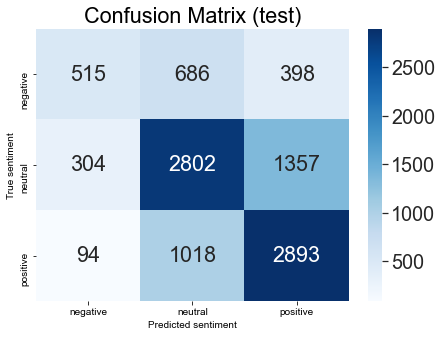

In [ ]:
plt.figure(figsize = (7,5))
ax= plt.subplot()
sns.set(font_scale=1.8)
sns.heatmap(cm_test, annot=True, fmt = 'g', cmap = 'Blues', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted sentiment');ax.set_ylabel('True sentiment'); 
ax.set_title('Confusion Matrix (test)'); 
ax.xaxis.set_ticklabels(['negative','neutral','positive']); 
ax.yaxis.set_ticklabels(['negative','neutral','positive']);
plt.show()


#### RUNNING AGAIN WITH FREQUENCY 1 removed

In [ ]:
import pickle

with open('tokenized_sens .pickle', 'rb') as handle:
    sentences = pickle.load(handle)
with open('y_new.pickle', 'rb') as handle:
    y_new = pickle.load(handle)

In [ ]:
sentences[7]

['tina',
 'fey',
 'amy',
 'poehler',
 'host',
 'golden',
 'globe',
 'award',
 'january',
 '13',
 'think']

In [ ]:
from collections import Counter
vocabulary = Counter()
for review in sentences: 
    vocabulary.update(review)
vocabulary = [word for word, count in vocabulary.most_common()]
len(vocabulary)

17841

In [ ]:
### BOW for reduced (no singletons!) dataset
words = list(set([word for tweet in sentences for word in tweet]))
all_vectors = []

for tweet in tqdm(sentences):
    all_vectors.append([1 if word in tweet else 0 for word in words])

100%|██████████| 50333/50333 [03:18<00:00, 253.76it/s]


In [ ]:
x_train, x_test,y_train, y_test = train_test_split(all_vectors,y_new, test_size = 0.2, random_state=100)


In [ ]:
### Multinomial NB - reduced dataset ~ 40,000 words
from sklearn.naive_bayes import MultinomialNB 

nb = MultinomialNB()
nb = nb.fit(x_train, y_train)

In [ ]:
### performance on test set
from sklearn import metrics
y_pred_test = nb.predict(x_test)
report_test = metrics.classification_report(y_test,y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.54      0.45      0.49      1597
           1       0.64      0.59      0.61      4469
           2       0.62      0.72      0.67      4001

    accuracy                           0.62     10067
   macro avg       0.60      0.59      0.59     10067
weighted avg       0.62      0.62      0.61     10067



In [ ]:
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
cm_test

array([[ 724,  527,  346],
       [ 464, 2624, 1381],
       [ 164,  965, 2872]])

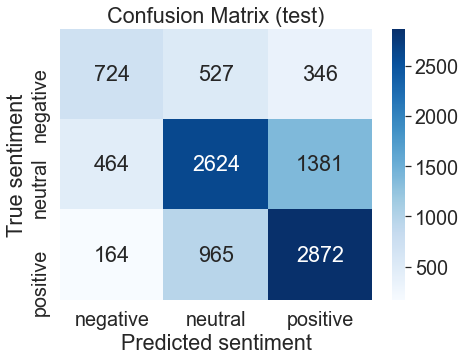

In [ ]:
plt.figure(figsize = (7,5))
ax= plt.subplot()
sns.set(font_scale=1.8)
sns.heatmap(cm_test, annot=True, fmt = 'g', cmap = 'Blues', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted sentiment');ax.set_ylabel('True sentiment'); 
ax.set_title('Confusion Matrix (test)'); 
ax.xaxis.set_ticklabels(['negative','neutral','positive']); 
ax.yaxis.set_ticklabels(['negative','neutral','positive']);
plt.show()

In [ ]:
### performance on training set - are we overfitting?

y_pred_train = nb.predict(x_train)
report_train = metrics.classification_report(y_train,y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      6243
           1       0.76      0.70      0.73     18121
           2       0.71      0.81      0.76     15902

    accuracy                           0.73     40266
   macro avg       0.72      0.71      0.71     40266
weighted avg       0.73      0.73      0.73     40266



In [ ]:
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
cm_train

array([[ 3782,  1366,  1095],
       [ 1345, 12748,  4028],
       [  454,  2633, 12815]])

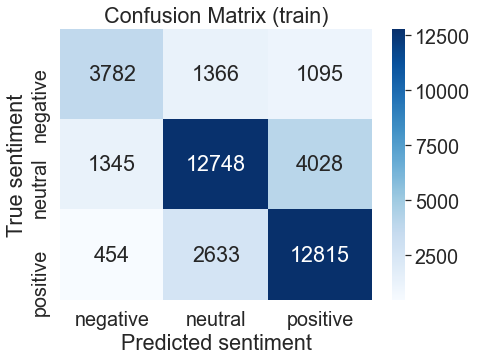

In [ ]:
plt.figure(figsize = (7,5))
ax= plt.subplot()
sns.set(font_scale=1.8)
sns.heatmap(cm_train, annot=True, fmt = 'g', cmap = 'Blues', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted sentiment');ax.set_ylabel('True sentiment'); 
ax.set_title('Confusion Matrix (train)'); 
ax.xaxis.set_ticklabels(['negative','neutral','positive']); 
ax.yaxis.set_ticklabels(['negative','neutral','positive']);
plt.show()

### RF - worse performance than Naïve Bayes - only finds the largest class

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(x_train,y_train)
y_pred_test = clf.predict(x_test)
report_test = metrics.classification_report(y_test,y_pred_test)
print(report_test)